In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler,normalize
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
df_listings = pd.read_csv('boston/listings.csv')

In [3]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
df_listings.shape

(3585, 95)

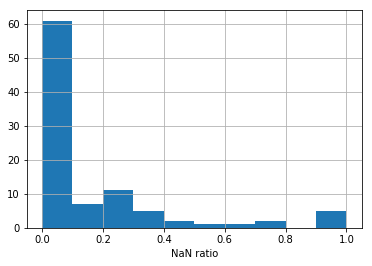

In [5]:
df_listings.isnull().mean().hist();
plt.xlabel('NaN ratio');

In [5]:
#check the ratio large than 0.5
df_listings.isnull().mean()[df_listings.isnull().mean()>0.5]

notes                           0.550907
neighbourhood_group_cleansed    1.000000
square_feet                     0.984379
weekly_price                    0.751185
monthly_price                   0.752301
security_deposit                0.625662
has_availability                1.000000
license                         1.000000
jurisdiction_names              1.000000
dtype: float64

In [6]:
df_listings.dtypes.value_counts()

object     62
float64    18
int64      15
dtype: int64

In [7]:
df_listings['price'].isnull().mean() #no null value

0.0

## Summary of feature:
*id,listing_url,scraped_id*:  not useful at this time <br />
*square_feet*: 98% missing <br />
*name,summary，space,description*: they are  all text valued,they include some important properties of the house, but it is hard to extract the information from them <br />
*experiences_offered*: all none values, useless <br />
*neighborhood_overview,notes,transit,access,interaction,house_rules*: all text value,I think they also include some important information(like neighborhood and transit) <br />
*host_id,host_url,host_name*: don't think they are important at this time <br />
*host_since*: may be usefull, the host may be more expierenced when start earlier <br />
*host_location*: where host comes from. may be important. People from different region are different <br />
*host_about*: personality of thehost, may be mortant. but it is textvlued <br />
*host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost*: may be important <br />
*host_thumbnail_url,host_picture_url*: useless <br />
*host_neighbourhood*: may be useful <br />
*host_listings_count,host_total_listings_count*: may be useful <br />
*host_verifications* : can be classified, may be useful <br />
*host_has_profile_pic,host_identity_verified*: can change to bool value, may be useful <br />
*street*: may not useful <br />
*neighbourhood,neighbourhood_cleansed*: may be useful <br />
*neighbourhood_group_cleansed*: all nan, useless <br />
*city,state,zipcode*: the values of state are all same. city and zipcode are corrolated. for city, 3381 out of 3585 are boston<br />
*market*: useless , only 3 of them are different from others <br />
*smart_location*: same as city <br />
*country_code*: all values are US, useless <br />
*longitude,latitude*: exact location of the host, should be useful <br />
*is_location_exact*: can change to bool valued, may be useful <br />
*property_type,room_type*: can be classified, should be useful <br />
*accommodates,bathrooms,beds*: may be useful <br />
*bed_type*: may be useful <br />
*amenities*: should be useful, need encode <br />
*price*: targe we are important <br />
*weekly_price,monthly_price*: should drop when predict price <br />
*cleaning_fee,guest_included,extra_people*:may be useful <br />
*minimum_nights,maximum_nights*: may be useful, the maximum_nights can larger than 1000 <br />
*calendar_updated*:may be useful <br />
*has_availability*: all NaN <br />
*availability_30,availability_365*:may be useful <br />
*calendar_last_scraped*: all value are the same, useless <br />
*number_of_reviews,first_review,last_review*: may be useful <br />
*review_scores_rating,review_scores_accuracy,review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location,review_scores_value*: may be useful <br />
*requires_license,license,jurisdiction_names* : all value are the same or None, useless <br />
*instant_bookable,cancellation_policy*: may be useful <br />
*require_guest_profile_picture,require_guest_phone_verification*: can change bool value, may be useful <br />
*calculated_host_listings_count*: may be useful <br />
*reviews_per_month*: may be interesting

In [8]:
#let's choose the features which are related to the price
feature_list=['neighbourhood','neighbourhood_cleansed','city','longitude','latitude',
              'is_location_exact','property_type','room_type','accommodates','bathrooms','beds',
             'bed_type','amenities','cleaning_fee','guests_included','extra_people',
              'availability_30','availability_365','number_of_reviews','instant_bookable','cancellation_policy',
             'require_guest_profile_picture','require_guest_phone_verification','calculated_host_listings_count',
             'reviews_per_month','price']

In [24]:
sub_df = df_listings[feature_list].copy()

In [10]:
#check null ratio, most selected features have 0 null ratio
sub_df.isnull().mean()

neighbourhood                       0.151464
neighbourhood_cleansed              0.000000
city                                0.000558
longitude                           0.000000
latitude                            0.000000
is_location_exact                   0.000000
property_type                       0.000837
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.003905
beds                                0.002510
bed_type                            0.000000
amenities                           0.000000
cleaning_fee                        0.308787
guests_included                     0.000000
extra_people                        0.000000
availability_30                     0.000000
availability_365                    0.000000
number_of_reviews                   0.000000
instant_bookable                    0.000000
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_gu

In [11]:
#most selected features have 0 NaN ratio
sub_df.isnull().mean()[sub_df.isnull().mean()>0]

neighbourhood        0.151464
city                 0.000558
property_type        0.000837
bathrooms            0.003905
beds                 0.002510
cleaning_fee         0.308787
reviews_per_month    0.210879
dtype: float64

In [12]:
#check data types
sub_df.dtypes.value_counts()

object     15
int64       6
float64     5
dtype: int64

## deal with numerical features
Here we are only interested in the features which have none zero NaN ratio

In [25]:
#check the bed
#for nan ratio bigger than 0
sub_df['beds'].isnull().mean()

0.002510460251046025

In [20]:
#some listing has zero bed
#will create a new colomns
sub_df['beds'].value_counts()

1.0     2165
2.0      953
3.0      275
4.0      106
5.0       40
6.0       16
7.0        8
8.0        6
0.0        4
9.0        2
16.0       1
Name: beds, dtype: int64

In [26]:
sub_df['has_beds']=sub_df['beds'].notnull()

In [27]:
sub_df['has_beds'].mean()

0.9974895397489539

In [28]:
#check bathrooms
#some listings have zero bathrooms
#will create new columns for NaN value
sub_df['bathrooms'].value_counts()

1.0    2751
2.0     478
1.5     208
2.5      68
3.0      21
3.5      13
0.0      13
0.5       7
5.0       5
6.0       4
4.0       2
4.5       1
Name: bathrooms, dtype: int64

In [29]:
sub_df['has_bathrooms'] = sub_df['bathrooms'].notnull()

In [30]:
sub_df['has_bathrooms'].mean()

0.996094839609484

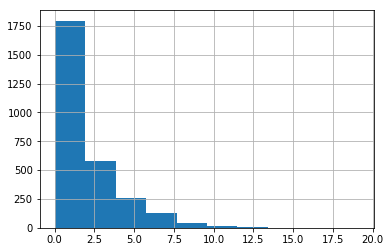

In [33]:
#check reivews per month
#the value can be very small
#I decide to create a new column for
#for the NaN value
sub_df['reviews_per_month'].hist()

In [34]:
sub_df['has_reviews_per_month'] = sub_df['reviews_per_month'].notnull()

In [35]:
sub_df['has_reviews_per_month'].mean()

0.7891213389121339

## deal with None numerical features

In [36]:
sub_df.dtypes[sub_df.dtypes=='object']

neighbourhood                       object
neighbourhood_cleansed              object
city                                object
is_location_exact                   object
property_type                       object
room_type                           object
bed_type                            object
amenities                           object
cleaning_fee                        object
extra_people                        object
instant_bookable                    object
cancellation_policy                 object
require_guest_profile_picture       object
require_guest_phone_verification    object
price                               object
dtype: object

### encode neighbourhood

In [153]:
sub_df['neighbourhood'].isnull().mean()

0.1514644351464435

In [37]:
# it has NaN values, we will not use drop_first option
sub_df['neighbourhood'].value_counts()

Allston-Brighton      364
Jamaica Plain         314
South End             298
Back Bay              291
Fenway/Kenmore        249
South Boston          216
Dorchester            195
Beacon Hill           174
North End             125
East Boston           117
Roxbury               116
Mission Hill          103
Charlestown            79
Chinatown              78
West End               68
Roslindale             50
West Roxbury           35
Theater District       33
Downtown Crossing      26
Hyde Park              25
Mattapan               20
Financial District     13
Somerville             13
Leather District        8
Brookline               8
Downtown                8
Cambridge               7
Chestnut Hill           4
Government Center       3
Harvard Square          2
Name: neighbourhood, dtype: int64

In [210]:
sub_df_m0 = pd.get_dummies(data=sub_df,columns=['neighbourhood'],prefix='neighborhood')

In [39]:
sub_df_m0.head()

,neighbourhood_cleansed,city,longitude,latitude,is_location_exact,property_type,room_type,accommodates,bathrooms,beds,...,neighborhood_Mission Hill,neighborhood_North End,neighborhood_Roslindale,neighborhood_Roxbury,neighborhood_Somerville,neighborhood_South Boston,neighborhood_South End,neighborhood_Theater District,neighborhood_West End,neighborhood_West Roxbury
0,Roslindale,Boston,-71.133068,42.282619,t,House,Entire home/apt,4,1.5,3.0,...,0,0,1,0,0,0,0,0,0,0
1,Roslindale,Boston,-71.134374,42.286241,t,Apartment,Private room,2,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
2,Roslindale,Boston,-71.135765,42.292438,t,Apartment,Private room,2,1.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,Roslindale,Boston,-71.121021,42.281106,f,House,Private room,4,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,Roslindale,Boston,-71.136258,42.284512,t,House,Private room,2,1.5,2.0,...,0,0,1,0,0,0,0,0,0,0


### encode neighbourhood_cleansed

In [504]:
sub_df_m0['neighbourhood_cleansed'].isnull().mean()

0.0

In [41]:
sub_df_m0['neighbourhood_cleansed'].value_counts()

Jamaica Plain              343
South End                  326
Back Bay                   302
Fenway                     290
Dorchester                 269
Allston                    260
Beacon Hill                194
Brighton                   185
South Boston               174
Downtown                   172
East Boston                150
Roxbury                    144
North End                  143
Mission Hill               124
Charlestown                111
South Boston Waterfront     83
Chinatown                   71
Roslindale                  56
West End                    49
West Roxbury                46
Hyde Park                   31
Bay Village                 24
Mattapan                    24
Longwood Medical Area        9
Leather District             5
Name: neighbourhood_cleansed, dtype: int64

In [211]:
#no NaN for this features, will drop first 
sub_df_m1 = pd.get_dummies(data=sub_df_m0,columns=['neighbourhood_cleansed'],prefix='neighbourhood_cleansed',drop_first=True)

In [212]:
sub_df_m1.head()

,city,longitude,latitude,is_location_exact,property_type,room_type,accommodates,bathrooms,beds,bed_type,...,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury
0,Boston,-71.133068,42.282619,t,House,Entire home/apt,4,1.5,3.0,Real Bed,...,0,0,0,1,0,0,0,0,0,0
1,Boston,-71.134374,42.286241,t,Apartment,Private room,2,1.0,1.0,Real Bed,...,0,0,0,1,0,0,0,0,0,0
2,Boston,-71.135765,42.292438,t,Apartment,Private room,2,1.0,1.0,Real Bed,...,0,0,0,1,0,0,0,0,0,0
3,Boston,-71.121021,42.281106,f,House,Private room,4,1.0,2.0,Real Bed,...,0,0,0,1,0,0,0,0,0,0
4,Boston,-71.136258,42.284512,t,House,Private room,2,1.5,2.0,Real Bed,...,0,0,0,1,0,0,0,0,0,0


### encode city

In [44]:
sub_df_m1['city'].value_counts() # some are the same, need some modification

Boston                       3381
Roxbury Crossing               24
Somerville                     19
Brookline                      18
Jamaica Plain                  18
Cambridge                      16
Brighton                       15
Charlestown                    15
Dorchester                     15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
Mattapan                        3
East Boston                     3
Boston, Massachusetts, US       2
South Boston                    2
ALLSTON                         2
Hyde Park                       2
Jamaica Plain                   2
Jamaica Plain, Boston           2
South End, Boston               1
Jamaica Plain (Boston)          1
dorchester, boston              1
Boston (Jamaica Plain)          1
Brighton                        1
Mission Hill, Boston            1
Watertown                       1
Newton                          1
east Boston   

In [45]:
sub_df_m1['city'].value_counts().index.tolist()#some has space in the end or beginning

['Boston',
 'Roxbury Crossing',
 'Somerville',
 'Brookline',
 'Jamaica Plain',
 'Cambridge',
 'Brighton',
 'Charlestown',
 'Dorchester',
 'Allston',
 'Roslindale',
 'West Roxbury',
 'ROXBURY CROSSING',
 'Mattapan',
 'East Boston',
 'Boston, Massachusetts, US',
 'South Boston',
 'ALLSTON',
 'Hyde Park',
 'Jamaica Plain ',
 'Jamaica Plain, Boston',
 'South End, Boston',
 'Jamaica Plain (Boston)',
 'dorchester, boston ',
 'Boston (Jamaica Plain)',
 'Brighton ',
 'Mission Hill, Boston',
 'Watertown',
 'Newton',
 'east Boston ',
 'Boston (Charlestown)',
 'Roslindale, Boston',
 'boston',
 'Jamaica Plain, MA',
 '波士顿',
 'Jamaica plain ',
 'Milton',
 'Boston ']

In [46]:
def city_map(city):
    names_map={'ROXBURY CROSSING':'Roxbury Crossing','Jamaica Plain, Boston':'Jamaica Plain','Boston, Massachusetts, US':'Boston',
              'Jamaica Plain ':'Jamaica Plain','ALLSTON':'Allston','South End, Boston':'South End Boston','Boston ':'Boston',
              'Roslindale, Boston':'Roslindale','Jamaica plain ':'Jamaica Plain','dorchester, boston ':'Dorchester',
              'Boston (Charlestown)':'Charlestown','Brighton ':'Brighton','Jamaica Plain, MA':'Jamaica Plain',
               'Boston (Jamaica Plain)':'Jamaica Plain','波士顿':'Boston','boston':'Boston','Jamaica Plain (Boston)':'Jamaica Plain'}
    if city in names_map:
        return names_map[city]
    else: 
        return city

In [213]:
sub_df_m1['city'].apply(city_map).value_counts()

Boston                  3386
Roxbury Crossing          28
Jamaica Plain             26
Somerville                19
Brookline                 18
Brighton                  16
Dorchester                16
Cambridge                 16
Charlestown               16
Allston                   14
Roslindale                 7
West Roxbury               5
East Boston                3
Mattapan                   3
Hyde Park                  2
South Boston               2
Milton                     1
Newton                     1
Watertown                  1
east Boston                1
Mission Hill, Boston       1
South End Boston           1
Name: city, dtype: int64

In [214]:
sub_df_m1['city'] = sub_df_m1['city'].apply(city_map)

In [215]:
sub_df_m1['city'].value_counts()

Boston                  3386
Roxbury Crossing          28
Jamaica Plain             26
Somerville                19
Brookline                 18
Brighton                  16
Dorchester                16
Cambridge                 16
Charlestown               16
Allston                   14
Roslindale                 7
West Roxbury               5
East Boston                3
Mattapan                   3
Hyde Park                  2
South Boston               2
Milton                     1
Newton                     1
Watertown                  1
east Boston                1
Mission Hill, Boston       1
South End Boston           1
Name: city, dtype: int64

In [216]:
sub_df_m1['city'].isnull().mean()

0.0005578800557880056

In [217]:
#for city, NaN will use (0,0,0...)
sub_df_m2 = pd.get_dummies(data=sub_df_m1,columns=['city'],prefix='city')
sub_df_m2.head()


,longitude,latitude,is_location_exact,property_type,room_type,accommodates,bathrooms,beds,bed_type,amenities,...,"city_Mission Hill, Boston",city_Newton,city_Roslindale,city_Roxbury Crossing,city_Somerville,city_South Boston,city_South End Boston,city_Watertown,city_West Roxbury,city_east Boston
0,-71.133068,42.282619,t,House,Entire home/apt,4,1.5,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",...,0,0,0,0,0,0,0,0,0,0
1,-71.134374,42.286241,t,Apartment,Private room,2,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",...,0,0,0,0,0,0,0,0,0,0
2,-71.135765,42.292438,t,Apartment,Private room,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",...,0,0,0,0,0,0,0,0,0,0
3,-71.121021,42.281106,f,House,Private room,4,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",...,0,0,0,0,0,0,0,0,0,0
4,-71.136258,42.284512,t,House,Private room,2,1.5,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",...,0,0,0,0,0,0,0,0,0,0


### encode is_location_exact

In [51]:
sub_df_m2['is_location_exact'].isnull().mean()#no NaN data

0.0

In [52]:
sub_df_m2['is_location_exact'].value_counts()

t    3080
f     505
Name: is_location_exact, dtype: int64

In [53]:
sub_df_m2['is_location_exact'].map({'t':True,'f':False}).value_counts()

True     3080
False     505
Name: is_location_exact, dtype: int64

In [218]:
sub_df_m2['is_location_exact']=sub_df_m2['is_location_exact'].map({'t':True,'f':False})

### encode property_type

In [55]:
sub_df_m2['property_type'].isnull().mean()

0.0008368200836820083

In [56]:
sub_df_m2['property_type'].value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Guesthouse            1
Camper/RV             1
Name: property_type, dtype: int64

In [219]:
#this feature also has nan values
sub_df_m3 = pd.get_dummies(data=sub_df_m2,columns=['property_type'],prefix='property_type')
sub_df_m3.head()

,longitude,latitude,is_location_exact,room_type,accommodates,bathrooms,beds,bed_type,amenities,cleaning_fee,...,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa
0,-71.133068,42.282619,True,Entire home/apt,4,1.5,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$35.00,...,0,0,0,0,0,1,0,0,0,0
1,-71.134374,42.286241,True,Private room,2,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$10.00,...,0,0,0,0,0,0,0,0,0,0
2,-71.135765,42.292438,True,Private room,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,...,0,0,0,0,0,0,0,0,0,0
3,-71.121021,42.281106,False,Private room,4,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$50.00,...,0,0,0,0,0,1,0,0,0,0
4,-71.136258,42.284512,True,Private room,2,1.5,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$15.00,...,0,0,0,0,0,1,0,0,0,0


### encode room_type, bed_type

In [86]:
sub_df_m3['room_type'].isnull().mean()

0.0

In [89]:
sub_df_m3['bed_type'].isnull().mean()

0.0

In [87]:
sub_df_m3['room_type'].value_counts()

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64

In [90]:
sub_df_m3['bed_type'].value_counts()

Real Bed         3453
Futon              51
Airbed             40
Pull-out Sofa      31
Couch              10
Name: bed_type, dtype: int64

In [220]:
sub_df_m4 = pd.get_dummies(data=sub_df_m3,columns=['room_type'],prefix='room_type',drop_first=True)
sub_df_m4.head()

,longitude,latitude,is_location_exact,accommodates,bathrooms,beds,bed_type,amenities,cleaning_fee,guests_included,...,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room
0,-71.133068,42.282619,True,4,1.5,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$35.00,1,...,0,0,0,1,0,0,0,0,0,0
1,-71.134374,42.286241,True,2,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$10.00,0,...,0,0,0,0,0,0,0,0,1,0
2,-71.135765,42.292438,True,2,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,1,...,0,0,0,0,0,0,0,0,1,0
3,-71.121021,42.281106,False,4,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$50.00,2,...,0,0,0,1,0,0,0,0,1,0
4,-71.136258,42.284512,True,2,1.5,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",$15.00,1,...,0,0,0,1,0,0,0,0,1,0


In [221]:
sub_df_m5 = pd.get_dummies(data=sub_df_m4,columns=['bed_type'],prefix='bed_type',drop_first=True)
sub_df_m5.head()

,longitude,latitude,is_location_exact,accommodates,bathrooms,beds,amenities,cleaning_fee,guests_included,extra_people,...,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,-71.133068,42.282619,True,4,1.5,3.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$35.00,1,$0.00,...,0,0,0,0,0,0,0,0,0,1
1,-71.134374,42.286241,True,2,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$10.00,0,$0.00,...,0,0,0,0,1,0,0,0,0,1
2,-71.135765,42.292438,True,2,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,1,$20.00,...,0,0,0,0,1,0,0,0,0,1
3,-71.121021,42.281106,False,4,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$50.00,2,$25.00,...,0,0,0,0,1,0,0,0,0,1
4,-71.136258,42.284512,True,2,1.5,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",$15.00,1,$0.00,...,0,0,0,0,1,0,0,0,0,1


### encode amenities

In [60]:
#this one will take some effort
sub_df_m5['amenities'].isnull().mean()

0.0

In [61]:
sub_df_m5['amenities'][0][1:-1].split(',')

['TV',
 '"Wireless Internet"',
 'Kitchen',
 '"Free Parking on Premises"',
 '"Pets live on this property"',
 'Dog(s)',
 'Heating',
 '"Family/Kid Friendly"',
 'Washer',
 'Dryer',
 '"Smoke Detector"',
 '"Fire Extinguisher"',
 'Essentials',
 'Shampoo',
 '"Laptop Friendly Workspace"']

In [160]:
#let's check how many amenities
amenity_list=[]
count=0
for s_l in sub_df_m5['amenities'].values:
    #if count>2:
    #    break
    count += 1
    for s in s_l[1:-1].split(','):
        #print(s.replace('"',''))
        amenity_list.append(s.replace('"',''))

In [63]:
amenity_list[0:5]

['TV',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Pets live on this property']

In [64]:
#let's check how many type
amenity_set = set(amenity_list)
len(amenity_set)

46

In [222]:
amenity_set

{'24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Free Parking on Street',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Paid Parking Off Premises',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50'}

In [66]:
#will ecnode them one by one
amenity_set.remove('')

In [67]:
amenity_set

{'24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Free Parking on Street',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Paid Parking Off Premises',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet',
 'translation missing: en.hosting_amenity_49',
 'translation missing: en.hosting_amenity_50'}

In [223]:
#add new columns related to amenity
for t in amenity_set:
    sub_df_m5[t] = False
    

In [69]:
nrows = sub_df_m5.shape[0]

In [70]:
nrows

3585

In [224]:
# set the right value
for a in amenity_set:
    for ir in range(nrows):
        if a in sub_df_m5['amenities'][ir]:
            sub_df_m5.loc[ir,a] = True
            
    

In [72]:
#some check
sub_df_m5['Pool'].value_counts()

False    3425
True      160
Name: Pool, dtype: int64

In [73]:
sub_df_m5['TV'].value_counts()

True     2725
False     860
Name: TV, dtype: int64

In [225]:
#let's check the amenities ratio
amenity_mean=sub_df_m5[list(amenity_set)].mean()

In [226]:
amenity_mean

Elevator in Building                          0.242120
Cable TV                                      0.493724
Wheelchair Accessible                         0.041283
Air Conditioning                              0.786890
Pets live on this property                    0.119665
Shampoo                                       0.675314
Smoke Detector                                0.811994
Indoor Fireplace                              0.109623
Fire Extinguisher                             0.441283
Smoking Allowed                               0.026499
Buzzer/Wireless Intercom                      0.234031
Pets Allowed                                  0.135565
Kitchen                                       0.916039
translation missing: en.hosting_amenity_49    0.123849
Gym                                           0.133612
Dryer                                         0.834868
Hangers                                       0.553696
translation missing: en.hosting_amenity_50    0.162064
Dog(s)    

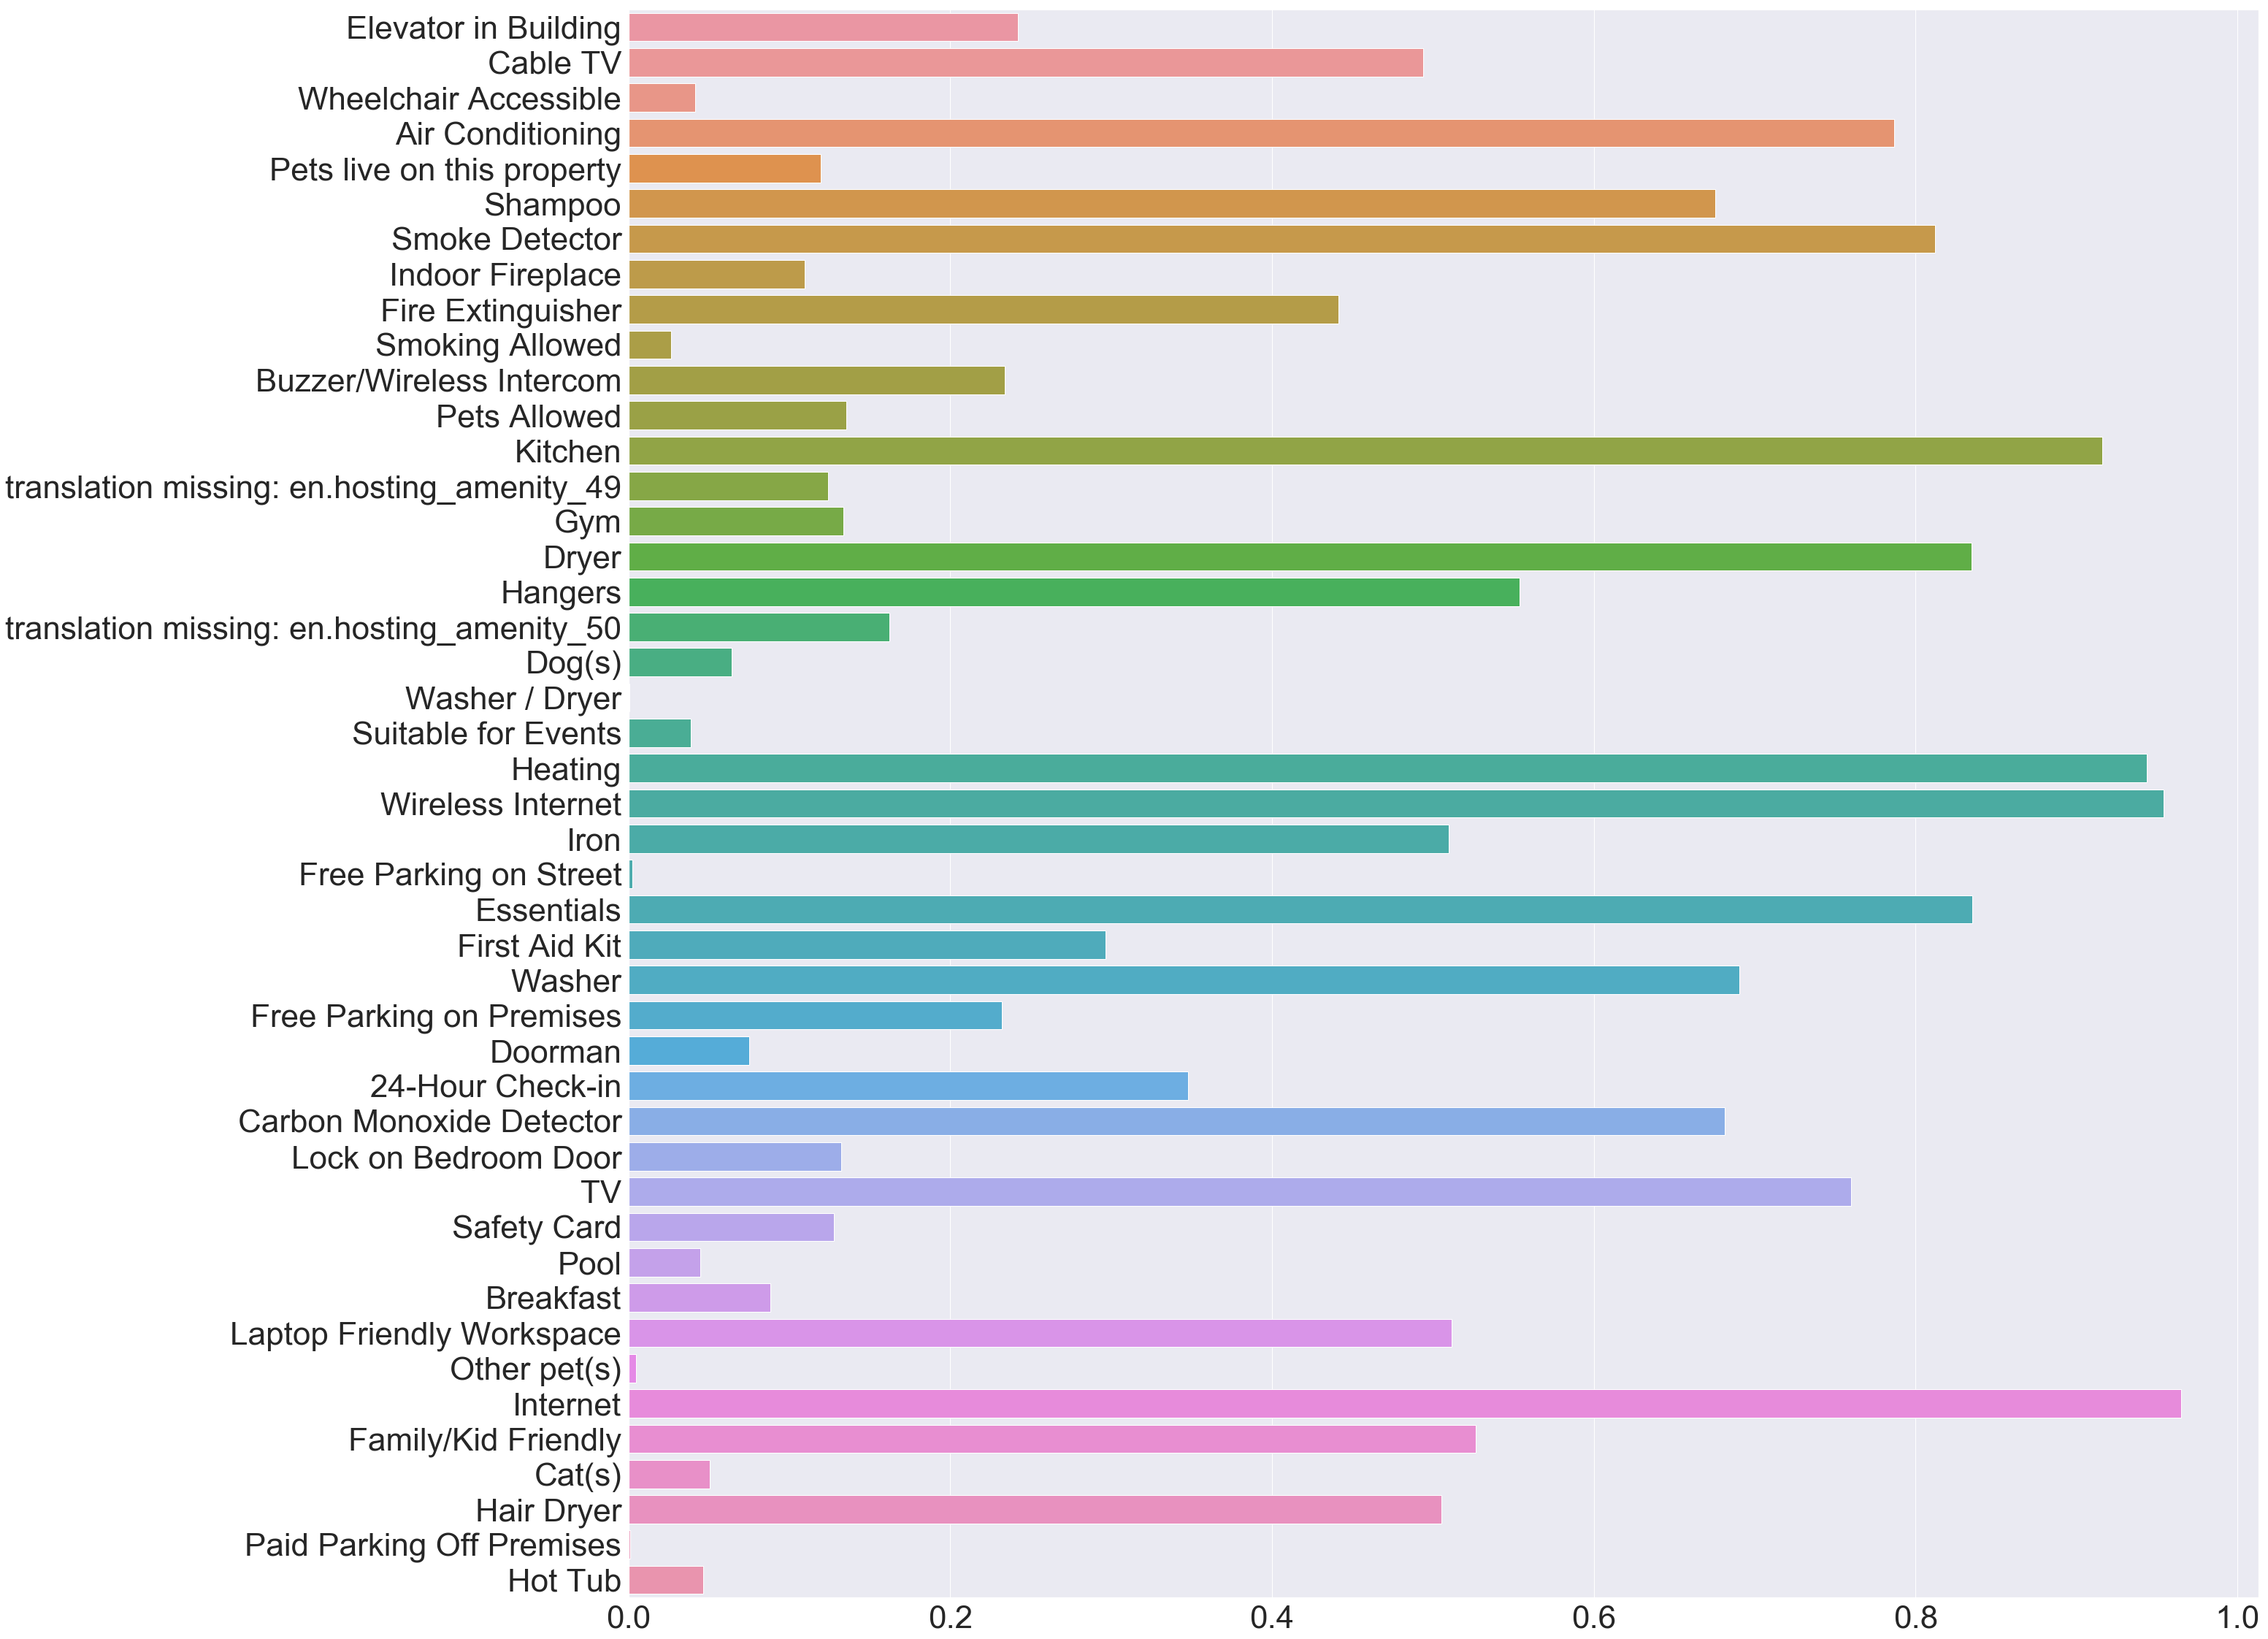

In [76]:
#visualize the amenity ratio
# we can seee Washer/Dryer, Free Parking on Street,Other pet(s),
#Paid Parking Off Premises, have very low ratio
#while kitchen,Heating,Wireless Internet,Internet have very high ratio
sb.set(font_scale=4)
fig, ax = plt.subplots(figsize=(40,40))
sb.barplot(y=amenity_mean.index,x=amenity_mean.values,ax=ax)


### encode cleaning_fee

In [220]:
# we should change it to float
sub_df_m5['cleaning_fee'].isnull().mean()

0.3087866108786611

In [242]:
sub_df_m5['cleaning_fee'].head()

0    $35.00
1    $10.00
2       NaN
3    $50.00
4    $15.00
Name: cleaning_fee, dtype: object

In [227]:
sub_df_m5['cleaning_fee'] = sub_df_m5['cleaning_fee'].astype('str')

In [256]:
sub_df_m5['cleaning_fee'].head()

0    $35.00
1    $10.00
2       nan
3    $50.00
4    $15.00
Name: cleaning_fee, dtype: object

In [78]:
def dollar_to_float(d):
    if d=='nan':
        return np.nan
    res = ""
    for s in d:
        if s !='$' and s !=',':
            res += s
    return float(res)

In [228]:
sub_df_m5['cleaning_fee'].apply(dollar_to_float).head()

0    35.0
1    10.0
2     NaN
3    50.0
4    15.0
Name: cleaning_fee, dtype: float64

In [229]:
sub_df_m5['cleaning_fee']=sub_df_m5['cleaning_fee'].apply(dollar_to_float)

In [230]:
sub_df_m5['cleaning_fee'].head(10)

0    35.0
1    10.0
2     NaN
3    50.0
4    15.0
5    30.0
6     NaN
7    10.0
8     NaN
9    50.0
Name: cleaning_fee, dtype: float64

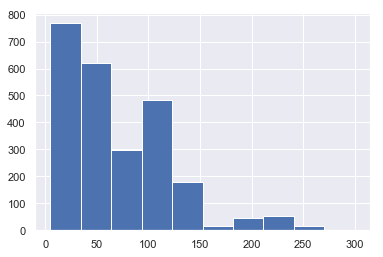

In [231]:
sb.set(font_scale=1)
sub_df_m5['cleaning_fee'].hist()

In [84]:
sub_df_m5['cleaning_fee'].describe()

count    2478.000000
mean       68.380145
std        51.297835
min         5.000000
25%        25.000000
50%        50.000000
75%       100.000000
max       300.000000
Name: cleaning_fee, dtype: float64

In [268]:
#create a new column indicate if they have the clean fee
sub_df_m5['has_cleaning_fee'] = False

In [232]:
sub_df_m5['has_cleaning_fee'] = sub_df_m5['cleaning_fee']>0

In [233]:
sub_df_m5['has_cleaning_fee'].mean()

0.6912133891213389

### encode extra_people

In [234]:
sub_df_m5['extra_people'].isnull().mean()

0.0

In [88]:
sub_df_m5['extra_people'].apply(dollar_to_float).head()

0     0.0
1     0.0
2    20.0
3    25.0
4     0.0
Name: extra_people, dtype: float64

In [235]:
sub_df_m5['extra_people'] = sub_df_m5['extra_people'].apply(dollar_to_float)

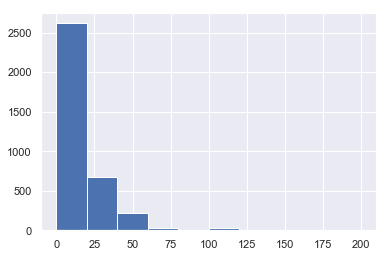

In [236]:
sub_df_m5['extra_people'].hist()

### encode instant_bookable

In [279]:
sub_df_m5['instant_bookable'].isnull().mean()

0.0

In [280]:
sub_df_m5['instant_bookable'].value_counts()

f    2991
t     594
Name: instant_bookable, dtype: int64

In [237]:
#change to bool
sub_df_m5['instant_bookable'].map({'f':False,'t':True}).head()

0    False
1     True
2    False
3    False
4    False
Name: instant_bookable, dtype: bool

In [238]:
sub_df_m5['instant_bookable']=sub_df_m5['instant_bookable'].map({'f':False,'t':True})

In [175]:
sub_df_m5['instant_bookable'].head()

0    False
1     True
2    False
3    False
4    False
Name: instant_bookable, dtype: bool

### encode cancellation_policy

In [94]:
sub_df_m5['cancellation_policy'].isnull().mean()

0.0

In [95]:
sub_df_m5['cancellation_policy'].value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [239]:
sub_df_m6 = pd.get_dummies(data=sub_df_m5,columns=['cancellation_policy'],prefix='cancel',drop_first=True)

In [177]:
sub_df_m6.head()

,longitude,latitude,is_location_exact,accommodates,bathrooms,beds,amenities,cleaning_fee,guests_included,extra_people,...,Internet,Family/Kid Friendly,Cat(s),Hair Dryer,Paid Parking Off Premises,Hot Tub,has_cleaning_fee,cancel_moderate,cancel_strict,cancel_super_strict_30
0,-71.133068,42.282619,True,4,1.5,3.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",35.0,1,0.0,...,True,True,False,False,False,False,True,1,0,0
1,-71.134374,42.286241,True,2,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",10.0,0,0.0,...,True,True,False,True,False,False,True,1,0,0
2,-71.135765,42.292438,True,2,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,1,20.0,...,True,False,False,False,False,False,False,1,0,0
3,-71.121021,42.281106,False,4,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",50.0,2,25.0,...,True,False,False,True,False,False,True,1,0,0
4,-71.136258,42.284512,True,2,1.5,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",15.0,1,0.0,...,True,False,False,True,False,False,True,0,0,0


### encode require_guest_profile_picture, require_guest_phone_verification 

In [293]:
sub_df_m6['require_guest_profile_picture'].isnull().mean()

0.0

In [294]:
sub_df_m6['require_guest_profile_picture'].value_counts()

f    3518
t      67
Name: require_guest_profile_picture, dtype: int64

In [98]:
sub_df_m6['require_guest_profile_picture'].map({'f':False,'t':True}).head()

0    False
1    False
2     True
3    False
4    False
Name: require_guest_profile_picture, dtype: bool

In [240]:
sub_df_m6['require_guest_profile_picture']=sub_df_m6['require_guest_profile_picture'].map({'f':False,'t':True})

In [179]:
sub_df_m6['require_guest_profile_picture'].head()

0    False
1    False
2     True
3    False
4    False
Name: require_guest_profile_picture, dtype: bool

In [299]:
sub_df_m6['require_guest_phone_verification'].isnull().mean()

0.0

In [300]:
sub_df_m6['require_guest_phone_verification'].value_counts()

f    3348
t     237
Name: require_guest_phone_verification, dtype: int64

In [301]:
sub_df_m6['require_guest_phone_verification'].map({'f':False,'t':True}).head()

0    False
1    False
2    False
3    False
4    False
Name: require_guest_phone_verification, dtype: bool

In [241]:
sub_df_m6['require_guest_phone_verification']=sub_df_m6['require_guest_phone_verification'].map({'f':False,'t':True})

In [242]:
sub_df_m6['require_guest_phone_verification'].value_counts()

False    3348
True      237
Name: require_guest_phone_verification, dtype: int64

### encode price

In [304]:
sub_df_m6['price'].isnull().mean()

0.0

In [305]:
sub_df_m6['price'].head()

0    $250.00
1     $65.00
2     $65.00
3     $75.00
4     $79.00
Name: price, dtype: object

In [306]:
sub_df_m6['price'].apply(dollar_to_float).head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

In [243]:
sub_df_m6['price'] = sub_df_m6['price'].apply(dollar_to_float)

In [308]:
sub_df_m6['price'].head()

0    250.0
1     65.0
2     65.0
3     75.0
4     79.0
Name: price, dtype: float64

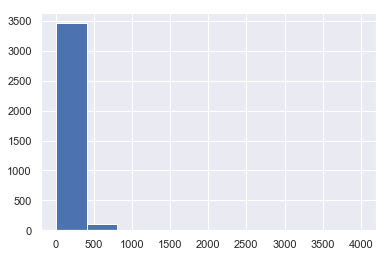

In [183]:
sub_df_m6['price'].hist()

In [184]:
sub_df_m6.head()

,longitude,latitude,is_location_exact,accommodates,bathrooms,beds,amenities,cleaning_fee,guests_included,extra_people,...,Internet,Family/Kid Friendly,Cat(s),Hair Dryer,Paid Parking Off Premises,Hot Tub,has_cleaning_fee,cancel_moderate,cancel_strict,cancel_super_strict_30
0,-71.133068,42.282619,True,4,1.5,3.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",35.0,1,0.0,...,True,True,False,False,False,False,True,1,0,0
1,-71.134374,42.286241,True,2,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",10.0,0,0.0,...,True,True,False,True,False,False,True,1,0,0
2,-71.135765,42.292438,True,2,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,1,20.0,...,True,False,False,False,False,False,False,1,0,0
3,-71.121021,42.281106,False,4,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",50.0,2,25.0,...,True,False,False,True,False,False,True,1,0,0
4,-71.136258,42.284512,True,2,1.5,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",15.0,1,0.0,...,True,False,False,True,False,False,True,0,0,0


## Model data

In [3]:
#all clean process has been coded into helpfuclion 
import helpfunction as hpf

In [4]:
clean_df = hpf.clean_list_data(df_listings)

process numerical features
process none numerical features


In [5]:
clean_df.head()

,longitude,latitude,is_location_exact,accommodates,bathrooms,beds,amenities,cleaning_fee,guests_included,extra_people,...,Essentials,TV,Cat(s),Pets Allowed,Kitchen,Free Parking on Premises,has_cleaning_fee,cancel_moderate,cancel_strict,cancel_super_strict_30
0,-71.133068,42.282619,True,4,1.5,3.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",35.0,1,0.0,...,True,True,False,False,True,True,True,1,0,0
1,-71.134374,42.286241,True,2,1.0,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",10.0,0,0.0,...,True,True,False,True,True,False,True,1,0,0
2,-71.135765,42.292438,True,2,1.0,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,1,20.0,...,True,True,False,False,True,True,False,1,0,0
3,-71.121021,42.281106,False,4,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",50.0,2,25.0,...,True,True,False,False,True,True,True,1,0,0
4,-71.136258,42.284512,True,2,1.5,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",15.0,1,0.0,...,True,False,False,False,True,False,True,0,0,0


In [294]:
#let's divide the price into 2 classes
#clean_df_sub = clean_df[clean_df['price']<400]

In [295]:
#clean_df_sub.shape

(3441, 166)

In [324]:
y = clean_df['price']
X = clean_df.drop(axis=1,columns=['price','amenities'])

In [325]:
y.shape

(3585,)

In [326]:
X.shape

(3585, 164)

### Data Imputer 
I will use mean for NaN

In [5]:
from sklearn.impute import SimpleImputer

In [9]:
imp = SimpleImputer()

In [327]:
X_m = imp.fit_transform(X)

### Data Scaling

In [6]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [328]:
X_m_scale = scaler.fit_transform(X_m)

## PCA Analysis
try to reduce the demension and also want to see the relation between the features

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=164)

In [16]:
pca.fit(X_m_scale)

PCA(copy=True, iterated_power='auto', n_components=164, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
var_ratio=pca.explained_variance_ratio_

In [18]:
cum_var_ratio = np.zeros(var_ratio.shape)

In [19]:
for i in np.arange(0,var_ratio.shape[0]):
    if i==0:
        cum_var_ratio[i]=var_ratio[i]
        continue
    cum_var_ratio[i] = cum_var_ratio[i-1]+var_ratio[i]

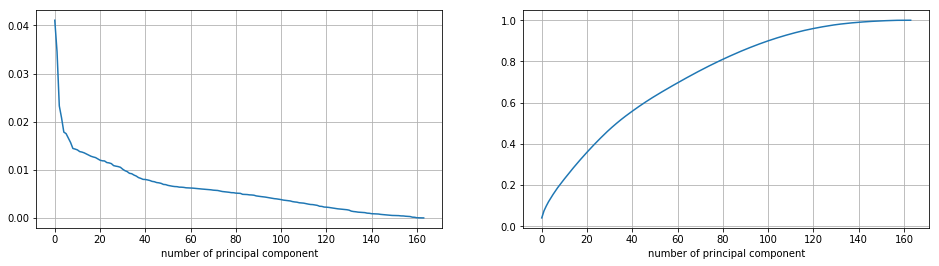

In [20]:
fig,axes = plt.subplots(1,2)
fig.set_figwidth(16)
axes[0].plot(var_ratio)
axes[0].grid(True)
axes[0].set_xlabel("number of principal component")
axes[1].plot(cum_var_ratio)
axes[1].set_xlabel("number of principal component")
axes[1].grid(True)

In [22]:
import math
from collections import OrderedDict

In [22]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
def get_pc_values_by_weight(df,pca,n=0):
    column_names = df.columns.values
    prin_comp = pca.components_[n]
    lk_values = list(zip(column_names,prin_comp))
    lk_values.sort(key=lambda tup: math.fabs(tup[1]),reverse=True)
    lk_values_map = OrderedDict({item[0]:item[1] for item in lk_values})
    return pd.Series(lk_values_map)

In [23]:
prin_com0 = get_pc_values_by_weight(X,pca,0)

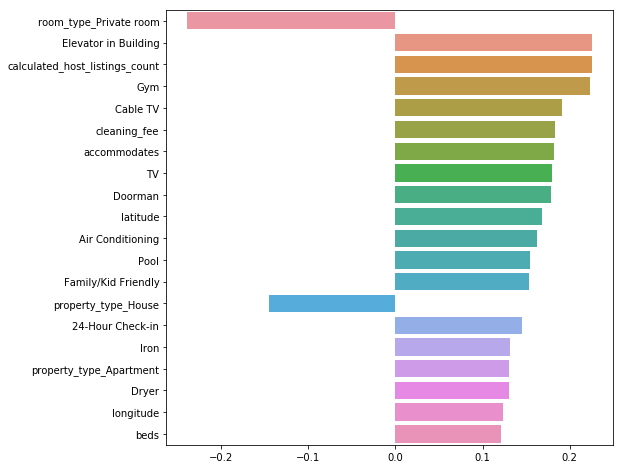

In [24]:
#this indicate the amenity which improves the living quality  
fig, ax = plt.subplots(figsize=(8,8))
ax = sb.barplot(y=prin_com0.index[0:20],x=prin_com0.values[0:20],ax=ax);

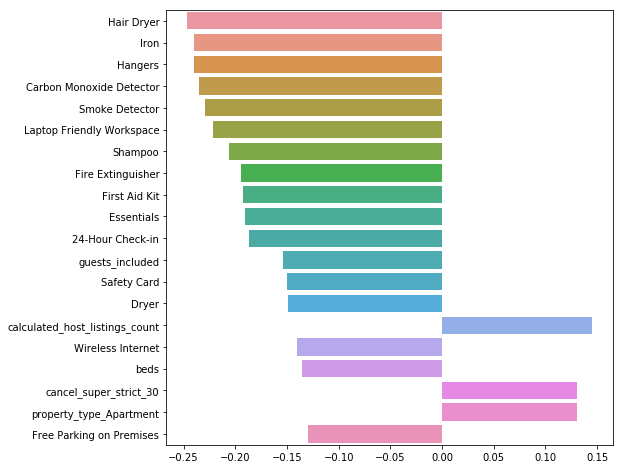

In [25]:
#this indicate the environment like safty and friendly
prin_com1 = get_pc_values_by_weight(X,pca,1)
fig, ax = plt.subplots(figsize=(8,8))
ax = sb.barplot(y=prin_com1.index[0:20],x=prin_com1.values[0:20],ax=ax);

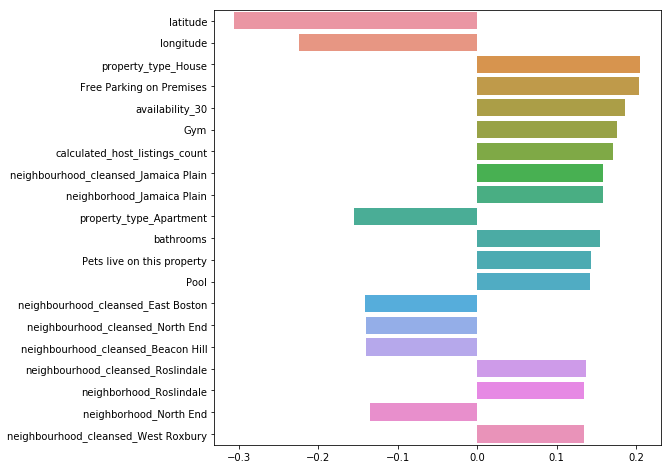

In [26]:
#this one indicate the position and neighbourhood of the listing
prin_com2 = get_pc_values_by_weight(X,pca,2)
fig, ax = plt.subplots(figsize=(8,8))
ax = sb.barplot(y=prin_com2.index[0:20],x=prin_com2.values[0:20],ax=ax);

In [27]:
X_m_scale_pca = pca.transform(X_m_scale)

### Model data and predict price
I will use all features

In [7]:
from sklearn.model_selection import train_test_split

In [330]:
X_train, X_test, y_train, y_test = train_test_split(X_m_scale,y, random_state=0)


#### Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score

In [332]:
#we need regulation for this
lrg = LinearRegression()
lrg.fit(X_train,y_train)
lrg_test_predict = lrg.predict(X_test)
lrg_train_predict = lrg.predict(X_train)
print("r2 score for train: ",r2_score(y_train,lrg_train_predict))
print("r2 score for test: ",r2_score(y_test,lrg_test_predict))

r2 score for train:  0.48313852359835163
r2 score for test:  -7.056479052142615e+22


In [333]:
#t set alpha=1
las_rg = Lasso(alpha=1)
las_rg.fit(X_train,y_train)
las_rg_train_predict = las_rg.predict(X_train)
las_rg_test_predict = las_rg.predict(X_test)
print("r2 score for train: ",r2_score(y_train,las_rg_train_predict))
print("r2 score for test: ",r2_score(y_test,las_rg_test_predict))

r2 score for train:  0.4723169090215753
r2 score for test:  0.24871078183132322


#### other model

In [9]:
#try other models
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [335]:
#decision tree
dec_tree = DecisionTreeRegressor(random_state=0,min_samples_split=64, min_samples_leaf=8)
dec_tree.fit(X_train,y_train)
dec_tree_train_predict = dec_tree.predict(X_train)
dec_tree_test_predict = dec_tree.predict(X_test)
print("r2 score for train ",r2_score(y_train,dec_tree_train_predict))
print("r2 score for test  ",r2_score(y_test,dec_tree_test_predict))

r2 score for train  0.49518921883454026
r2 score for test   0.23170468068152816


In [336]:
#ada boost
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),learning_rate=0.5,n_estimators=70)
ada_reg.fit(X_train,y_train)
ada_reg_train_predict = ada_reg.predict(X_train)
ada_reg_test_predict = ada_reg.predict(X_test)
print("r2 score for train ",r2_score(y_train,ada_reg_train_predict))
print("r2 score for test  ",r2_score(y_test,ada_reg_test_predict))

r2 score for train  0.9052139290249315
r2 score for test   0.24165441860847403


In [337]:
#let's try random forest
rad_f_reg = RandomForestRegressor(n_estimators=60,min_samples_split=6,min_samples_leaf=4)
rad_f_reg.fit(X_train,y_train)
rad_f_reg_train_predict = rad_f_reg.predict(X_train)
rad_f_reg_test_predict = rad_f_reg.predict(X_test)
print("r2 score for train ",r2_score(y_train,rad_f_reg_train_predict))
print("r2 score for test  ",r2_score(y_test,rad_f_reg_test_predict))

r2 score for train  0.7084268317552367
r2 score for test   0.2548593222648837


In [340]:
gb_reg =GradientBoostingRegressor(n_estimators=50,learning_rate=0.1,min_samples_split=6,min_samples_leaf=4)
gb_reg.fit(X_train,y_train)
gb_reg_train_predict = gb_reg.predict(X_train)
gb_reg_test_predict = gb_reg.predict(X_test)
print("r2 score for train ",r2_score(y_train,gb_reg_train_predict))
print("r2 score for test  ",r2_score(y_test,gb_reg_test_predict))

r2 score for train  0.5831645706879387
r2 score for test   0.23652216880101795


## Revisiting price
The prediction for price is so bad, I think there must be something strange happened

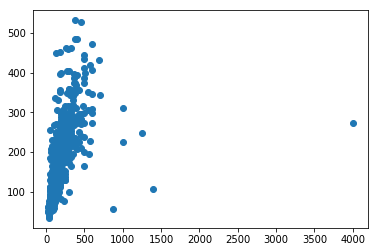

In [345]:
#let's first plot the prediction vs true
plt.scatter(y_test,rad_f_reg_test_predict)

In [346]:
#it looks like we have good agreement  for price < 600
#the r2 score looks better for the price <600
r2_score(y_test[y_test<600],rad_f_reg_test_predict[y_test<600])

0.6206149865998276

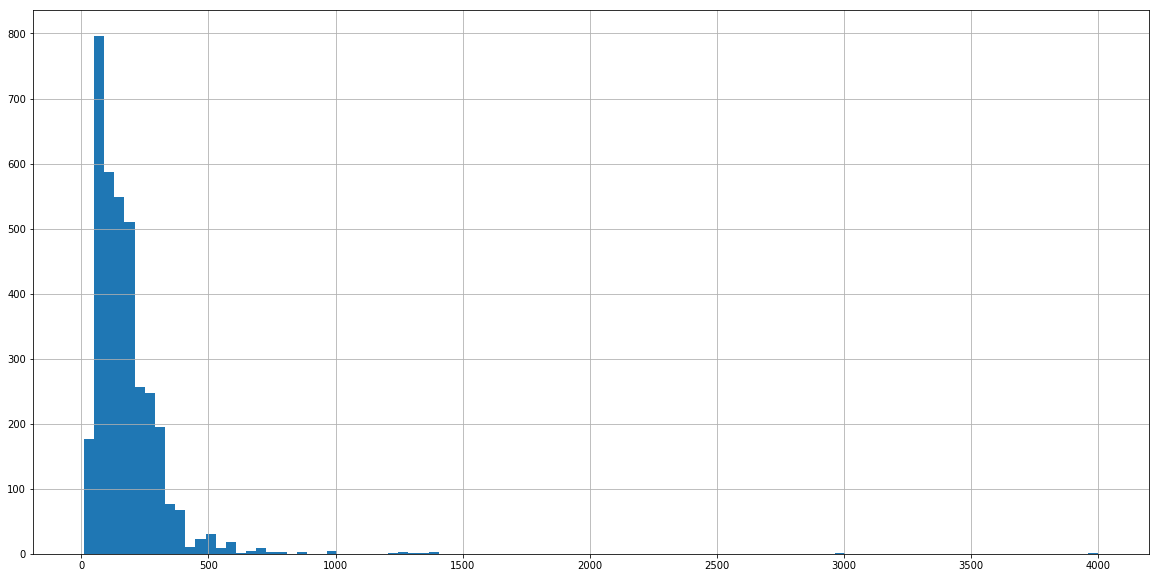

In [347]:
#let's draw the histogram of the price
#most price is less than $400, we also see very high price, which looks ridiculous for me
plt.figure(figsize=(20,10))
clean_df['price'].hist(bins=100)

In [349]:
#the highest price is $4000
clean_df['price'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [350]:
#let's find the $4000 listings
#the id is 2285
clean_df[clean_df['price']==4000]

,longitude,latitude,is_location_exact,accommodates,bathrooms,beds,amenities,cleaning_fee,guests_included,extra_people,...,Essentials,TV,Cat(s),Pets Allowed,Kitchen,Free Parking on Premises,has_cleaning_fee,cancel_moderate,cancel_strict,cancel_super_strict_30
2285,-71.09758,42.347934,True,4,1.0,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,2,50.0,...,True,True,False,False,True,False,False,0,1,0


In [351]:
df_listings['price'][2285]

'$4,000.00'

In [353]:
#let's check other information
df_listings['summary'][2285]

'Central Heat/AC, cable/internet, electricity, and hot water included. Fully furnished one bedroom apt. with sofa bed in living room. Kenmore Sq train/bus station less than a minute away   Located at 534 Commonwealth Ave. Nearby Eastern Standard bar and restaurant, Fenway Park, House of Blues, Boston University, Lansdowne st, Longwood Medical area Hospitals, etc. Very convenient during all seasons. Right in the middle of the city.'

In [354]:
df_listings['description'][2285]

'Central Heat/AC, cable/internet, electricity, and hot water included. Fully furnished one bedroom apt. with sofa bed in living room. Kenmore Sq train/bus station less than a minute away   Located at 534 Commonwealth Ave. Nearby Eastern Standard bar and restaurant, Fenway Park, House of Blues, Boston University, Lansdowne st, Longwood Medical area Hospitals, etc. Very convenient during all seasons. Right in the middle of the city. Practicality, functionality, location, comfort Kenmore Square/Fenway Park, Boston, Massachusetts Kenmore Square Green line train & bus station Super Strict 30 Days: 50% refund up until 30 days prior to arrival, except fees Note: The Super Strict cancellation policy applies to special circumstances and is by invitation only. Cleaning fees are always refunded if the guest did not check in. The Airbnb service fee is non-refundable. If there is a complaint from either party, notice must be given to Airbnb within 24 hours of check-in. Airbnb will mediate when nece

In [366]:
df_listings['space'][2285]

'Practicality, functionality, location, comfort'

In [367]:
df_listings['notes'][2285]

'Super Strict 30 Days: 50% refund up until 30 days prior to arrival, except fees Note: The Super Strict cancellation policy applies to special circumstances and is by invitation only. Cleaning fees are always refunded if the guest did not check in. The Airbnb service fee is non-refundable. If there is a complaint from either party, notice must be given to Airbnb within 24 hours of check-in. Airbnb will mediate when necessary, and has the final say in all disputes. A reservation is officially canceled when the guest clicks the cancellation button on the cancellation confirmation page, which they can find in Dashboard > Your Trips > Change or Cancel. Cancellation policies may be superseded by the Guest Refund Policy, safety cancellations, or extenuating circumstances. Please review these exceptions. Applicable taxes will be retained and remitted.'

In [368]:
df_listings['house_rules'][2285]

'Be considerate of others.  Quiet hours after 10 pm.  No smoking. Super Strict 30 Days: 50% refund up until 30 days prior to arrival, except fees Note: The Super Strict cancellation policy applies to special circumstances and is by invitation only. Cleaning fees are always refunded if the guest did not check in. The Airbnb service fee is non-refundable. If there is a complaint from either party, notice must be given to Airbnb within 24 hours of check-in. Airbnb will mediate when necessary, and has the final say in all disputes. A reservation is officially canceled when the guest clicks the cancellation button on the cancellation confirmation page, which they can find in Dashboard > Your Trips > Change or Cancel. Cancellation policies may be superseded by the Guest Refund Policy, safety cancellations, or extenuating circumstances. Please review these exceptions. Applicable taxes will be retained and remitted.'

In [369]:
df_listings['neighborhood_overview'][2285]

'Kenmore Square/Fenway Park, Boston, Massachusetts'

In [370]:
df_listings['weekly_price'][2285]

nan

In [371]:
df_listings['monthly_price'][2285]

nan

In [ ]:
df_listings['monthly_price'][2285]

In [372]:
df_listings['minimum_nights'][2285]

6

In [375]:
df_listings['amenities'][2285]

'{TV,Internet,"Wireless Internet","Air Conditioning",Kitchen,"Elevator in Building",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials,Shampoo,"Lock on Bedroom Door","24-Hour Check-in",Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}'

In [376]:
df_listings['maximum_nights'][2285]

1125

In [378]:
df_listings['id'][2285]

12972378

In [379]:
df_listings['number_of_reviews'][2285]

0

In [381]:
df_listings['reviews_per_month'][2285]

nan

In [387]:
clean_df['price'].sort_values(ascending=False).head()

2285    4000.0
3055    3000.0
793     1400.0
2204    1372.0
1950    1345.0
Name: price, dtype: float64

In [388]:
df_listings['description'][3055]

'Look out the window, use the common space, whatever you would like to do for the IndyCar race in Boston on Septemb(PHONE NUMBER HIDDEN).  INCREDIBLE opportunity to see the cars literally go by 15 feet away.'

In [389]:
df_listings['number_of_reviews'][3055]

0

In [390]:
df_listings['summary'][3055]

'Look out the window, use the common space, whatever you would like to do for the IndyCar race in Boston on Septemb(PHONE NUMBER HIDDEN).  INCREDIBLE opportunity to see the cars literally go by 15 feet away.'

In [391]:
#the price is monthly price
df_listings['description'][793]

"波士顿暑假住房出租:三室两厅,主卧出租,位于\\'Northeast university对面,步行五分钟到Ma Avenue站橙线及绿线,步行十五分钟到Prudential Center. Whole food,cvs都在附近. 屋内空间非常大 而且干净整洁。$1400/每个月. 包水暖.暑假只有一个女室友在. (SENSITIVE CONTENTS HIDDEN):(PHONE NUMBER HIDDEN) 屋内有独立卫生间和淋浴"

In [395]:
df_listings['weekly_price'][793]

nan

In [392]:
df_listings['description'][2204]

'There are three other lovely roommates who are students in Northeastern University.'

In [393]:
df_listings['summary'][2204]

'There are three other lovely roommates who are students in Northeastern University.'

In [397]:
df_listings['description'][1950]

"Relaxing city living yet blocks away from the State House, MGH, bakeries, shops and city parks, our apartment in Beacon Hill offers the very finest in comfort and Relaxation in the core of Beacon Hill set on a quite sunny side street. We offer turn down service for an additional cost so you will never need to do dishes, take out trash, or change sheets when you're on the go. we provide secure, controlled mail and package delivery. Within blocks of the Esplanade, restaurants, Parks, and the MBTA. Newly renovated 1 bed in Beacon Hill. we have used West Elm furniture to furnish this unit with upscale beddings and mattresses. Hardwood floors throughout, freshly-painted 1BD/1BA apartment offers a spacious living room with a gas fire place with north and south-facing windows. Large walk-in closet, luxury bed, 55 inch wall mounted tv, wifi, cable tv, Netflix, Hulu, washer and dryer located in the unit. This unit offers turn down service so if you're ever in the need of fresh sheets, trash pi

In [399]:
df_listings['summary'][1950]

"Relaxing city living yet blocks away from the State House, MGH, bakeries, shops and city parks, our apartment in Beacon Hill offers the very finest in comfort and Relaxation in the core of Beacon Hill set on a quite sunny side street. We offer turn down service for an additional cost so you will never need to do dishes, take out trash, or change sheets when you're on the go. we provide secure, controlled mail and package delivery. Within blocks of the Esplanade, restaurants, Parks, and the MBTA."

### Summary for the abnomal price

By checking some other imformation like summary, description and so on. For row 793, the price is monthly price. For row 3055, you can see IndyCar race. For row 1950, they provide some services:you will never need to do dishes, take out trash, or change sheets when you're on the go. they also provide secure, controlled mail and package delivery. For the 4000 listing, I have no idea why it is so expensive, it may be a typo (should be $400). In short, the high price is caused by some special reason which you may find in the text value features 

In [10]:
#Let's exclude the abnomal price and redo the price regression
#only 3585-3441 = 144 rows are dropped
clean_df_sub = clean_df[clean_df['price']<400]
clean_df_sub.shape

(3441, 168)

In [11]:
y = clean_df_sub['price']
X = clean_df_sub.drop(axis=1,columns=['price','amenities'])

In [12]:
#imput and scale
imp = SimpleImputer()
X_m = imp.fit_transform(X)
scaler = StandardScaler()
X_m_scale = scaler.fit_transform(X_m)


In [13]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X_m_scale,y, random_state=0)

In [14]:
#fit the model and get r2 score
#linear model
#need regulation
lrg = LinearRegression()
lrg.fit(X_train,y_train)
lrg_test_predict = lrg.predict(X_test)
lrg_train_predict = lrg.predict(X_train)
print("r2 score for train: ",r2_score(y_train,lrg_train_predict))
print("r2 score for test: ",r2_score(y_test,lrg_test_predict))

r2 score for train:  0.7065751981987425
r2 score for test:  -8.01356680022288e+16


In [15]:
#lasso
#t set alpha=1
las_rg = Lasso(alpha=0.3)
las_rg.fit(X_train,y_train)
las_rg_train_predict = las_rg.predict(X_train)
las_rg_test_predict = las_rg.predict(X_test)
print("r2 score for train: ",r2_score(y_train,las_rg_train_predict))
print("r2 score for test: ",r2_score(y_test,las_rg_test_predict))

r2 score for train:  0.7029725973980653
r2 score for test:  0.6765025492442045


In [16]:
#decision tree
dec_tree = DecisionTreeRegressor(random_state=0,min_samples_split=64, min_samples_leaf=8)
dec_tree.fit(X_train,y_train)
dec_tree_train_predict = dec_tree.predict(X_train)
dec_tree_test_predict = dec_tree.predict(X_test)
print("r2 score for train ",r2_score(y_train,dec_tree_train_predict))
print("r2 score for test  ",r2_score(y_test,dec_tree_test_predict))

r2 score for train  0.7272848059508104
r2 score for test   0.6403610344048095


In [17]:
#ada boost
ada_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=12),learning_rate=1.5,n_estimators=70)
ada_reg.fit(X_train,y_train)
ada_reg_train_predict = ada_reg.predict(X_train)
ada_reg_test_predict = ada_reg.predict(X_test)
print("r2 score for train ",r2_score(y_train,ada_reg_train_predict))
print("r2 score for test  ",r2_score(y_test,ada_reg_test_predict))

r2 score for train  0.9793336880490282
r2 score for test   0.713079420405557


In [18]:
#let's try random forest
rad_f_reg = RandomForestRegressor(n_estimators=40,min_samples_split=8,min_samples_leaf=4)
rad_f_reg.fit(X_train,y_train)
rad_f_reg_train_predict = rad_f_reg.predict(X_train)
rad_f_reg_test_predict = rad_f_reg.predict(X_test)
print("r2 score for train ",r2_score(y_train,rad_f_reg_train_predict))
print("r2 score for test  ",r2_score(y_test,rad_f_reg_test_predict))

r2 score for train  0.8884287930515679
r2 score for test   0.708662179552283


In [19]:
gb_reg =GradientBoostingRegressor(n_estimators=70,learning_rate=0.3,min_samples_split=8,min_samples_leaf=4)
gb_reg.fit(X_train,y_train)
gb_reg_train_predict = gb_reg.predict(X_train)
gb_reg_test_predict = gb_reg.predict(X_test)
print("r2 score for train ",r2_score(y_train,gb_reg_train_predict))
print("r2 score for test  ",r2_score(y_test,gb_reg_test_predict))

r2 score for train  0.8285099826614541
r2 score for test   0.7048124178242223


In [20]:
def print_importance(weight,df):
    #input: weight array of importance
    #df data frame
    #return the first 20 important features 
    lk_values = list(zip(df.columns.tolist(),weight))
    lk_values.sort(key=lambda tup: math.fabs(tup[1]),reverse=True)
    lk_values_map = OrderedDict({item[0]:item[1] for item in lk_values})
    lk_se = pd.Series(lk_values_map)
    fig, ax = plt.subplots(figsize=(8,8))
    ax = sb.barplot(y=lk_se.index[0:20],x=lk_se.values[0:20],ax=ax);
    

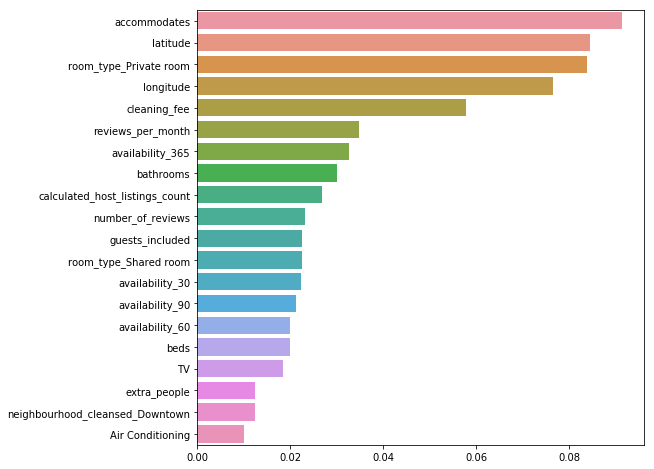

In [23]:
#use adaboost regression 
print_importance(ada_reg.feature_importances_,X)